<a href="https://colab.research.google.com/github/adasegroup/ML2020_seminars/blob/master/seminar16/seminar_clustering_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Clustering

#### Seminar structure:

* Clustering for IRIS data
* Scoring for cluster analysis
* Clustering methods
* Recap: dimensionality reduction, anomaly detection and clustering

#### Seminar interactive board: https://www.menti.com/7mxafef729

## 1. Cluster analysis, what for?

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Nice and very accurate classification, and why do we need cluster analysis?', np.round(clf.score(X_test, y_test),3))

Nice and very accurate classification, and why do we need cluster analysis? 0.978


In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

def plot_3d (X, y, title = 'MNIST visualization PCA'):
    
    digits_3d = pd.DataFrame({
        'x': X[:, 0], 
        'y': X[:, 1], 
        'z': X[:, 2],
        'label': y,
    })

    colors = cl.scales['10']['qual']['Paired']
    data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color 
            }
        }
        data.append(trace)

    layout = go.Layout(
        title= title,
        width=900,
        height=600
    )

    fig = go.Figure(data=data, layout=layout)

    iplot(fig, show_link = False)

In [3]:
plot_3d(X, y, 'IRIS true labels')

#### But what if we have no targets at all?

In [4]:
plot_3d(X, np.zeros_like(y), 'IRIS no labels :(')

### 1.1. We do not know clustering algorithms, what we can do right now?

- apply dimensionality reduction methods;
- apply anomaly detection methods;
- estimate visually;

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # just becouse it of 3D visualisation

iris = load_iris()
X = iris.data
y = iris.target

pca.fit(X)
X = pca.transform(X)
plot_3d(X, np.zeros_like(y), 'PCA() IRIS no labels')

### 1.2. Scoring methods in cluster analysis:

How can we estimate the accurasy of the clustering if we have no labels?

In [6]:
dummy_labels = np.zeros_like(y)

dummy_labels[X[:,0] > -2] = 1 # defining two classes

# let' have look how it worked out
plot_3d(X, dummy_labels, 'PCA() IRIS, dummy labels')

#### 1.2.1. Homogeneity, completeness, and V-measure

Homogeneity, completeness, and V-measure are three key related indicators of the quality of a clustering operation. 

**Homogenity:** scores that each cluster has data-points belonging to the same class label. Homogeneity describes the closeness of the clustering algorithm to this perfection.

For $N$ data samples, C different class labels, $K$ clusters and $a_{ck}$ number of data-points belonging to the class c and cluster k. Then the homogeneity $h$ is given by the following:
$$h = 1- \frac{H(C,K)}{H(C)}$$,

where 
$$H(C,K) = - \sum_{k=1}^{K}\sum_{c=1}^{C} \frac{a_{ck}}{N} log(\frac{a_{ck}}{\sum_{c=1}^{C}a_{ck}})$$
and

$$H(C) = -\sum_{c=1}^{C} \frac{\sum_{k=1}^{K} a_{ck}}{C} log(\frac{\sum_{k=1}^{K} a_{ck}}{C})$$

**Completeness:** scores if all data-points belonging to the same class are clustered into the same cluster. Completeness describes the closeness of the clustering algorithm to this perfection.

$$ c = 1 - \frac{H(K,C)}{H(K)}$$

**V-Measure**:

`v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)`


Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html

#### 1.2.2. Silhouette coefficient

The silhouette coefficient contrasts the average distance to elements in the same cluster with the average distance to elements in other clusters. Objects with a high silhouette value are considered well clustered, objects with a low value may be outliers. This index works well with k-means clustering, and is also used to determine the optimal number of clusters.

Assume the data have been clustered via any technique, such as `k-means`, into $k$ clusters. 

For data point $i \in C_i$ (data point $i$ in the cluster $C_i$), let 

$$ a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, i \neq j} d(i, j) $$

be the mean distance between $i$ and all other data points in the same cluster, where $d(i, j)$ is the distance between data points $i$ and $j$ in the cluster $C_i$ (we divide by $|C_i| - 1$ because we do not include the distance $d(i, i)$ in the sum). We can interpret $a(i)$ as a measure of how well $i$ is assigned to its cluster (the smaller the value, the better the assignment). 

#### 1.2.3. Rand index adjusted for chance.

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

#### 1.2.4. Mutual Information between two clusterings.
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels of the same data. Where 
 is the number of the samples in cluster 
 and 
 is the number of the samples in cluster 
, the Mutual Information between clusterings  and  is given as:

$$MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}$$


This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Credit for: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score

In [7]:
from sklearn import metrics

def cluster_scoring(X, y, dummy_labels):
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, dummy_labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, dummy_labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, dummy_labels))
    print("Silhouette Score: %.3f" % metrics.silhouette_score(X, dummy_labels))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y, dummy_labels))
    print("Mutual Information: %.3f" % metrics.mutual_info_score(y, dummy_labels))
    
cluster_scoring(X, y, dummy_labels)

Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Silhouette Score: 0.693
Adjusted Rand-Index: 0.568
Mutual Information: 0.637


#### And let's define the pivot table:

In [8]:
iris_cluster = pd.DataFrame()

def cluster_scoreing_pivot(X, y, dummy_labels, iris_cluster, alg):
    cluster_scoring(X, y, dummy_labels)
    iris_cluster = iris_cluster.append({'algorithm':alg,
                        'hom': metrics.homogeneity_score(y, dummy_labels),
                        'comp': metrics.completeness_score(y, dummy_labels),
                        'v-measure': metrics.v_measure_score(y, dummy_labels),
                        'silhouette': metrics.silhouette_score(X, dummy_labels),
                        'rand. index': metrics.adjusted_rand_score(y, dummy_labels),
                        'mutual info': metrics.mutual_info_score(y, dummy_labels)}, ignore_index =True) 
    return iris_cluster 

iris_cluster = cluster_scoreing_pivot(X, y, dummy_labels, iris_cluster, 'dummy')

Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Silhouette Score: 0.693
Adjusted Rand-Index: 0.568
Mutual Information: 0.637


## 2. Clustering types:

#### __Clustering__ - is unsupervised learning methods for gouping samples.

#### types: 

    1.1. Centroid-based Clustering
    1.2. Density-based Clustering 
    1.3. Hierarchical Clustering
    1.4. Distribution-based Clustering

## 2.1. Centroid-based Clustering: `KMeans`

Organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. This course focuses on k-means because it is an efficient, effective, and simple clustering algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

![kmeans](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)

from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(2)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 2')
iris_cluster = cluster_scoreing_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 2')

What is we do not know the `n_components`?

### Let's go to Seminar #14

We will estimate the Intrinsic Dimentionality of IRIS with MLE etimation.

NIPS 2004: https://papers.nips.cc/paper/2577-maximum-likelihood-estimation-of-intrinsic-dimension.pdf

In [9]:
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasian statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=2, mode='bootstrap', **func_kw):
    rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

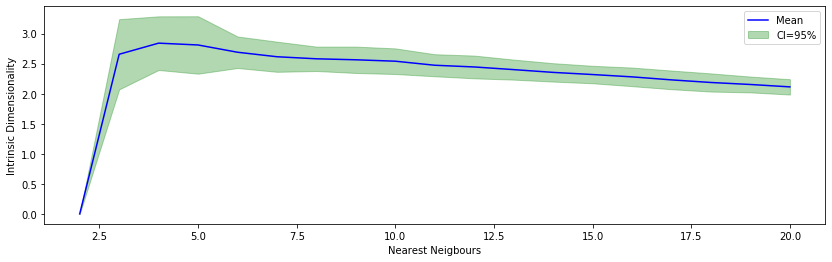

In [10]:
import warnings
warnings.filterwarnings("ignore")

k1 = 2 # start of interval(included)
k2 = 20 # end of interval(included)
nb_iter = 10 # more iterations more accuracy

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans # what is the difference between these two?

X = iris.data
y = iris.target

km = KMeans(3)
km.fit(X)

plot_3d(X, km.labels_, 'KMeans, n_components = 3')
iris_cluster = cluster_scoreing_pivot(X, y, km.labels_, iris_cluster, 'KMeans, 3')

Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758
Silhouette Score: 0.553
Adjusted Rand-Index: 0.730
Mutual Information: 0.826


## 2.2. Density-based Clustering: `DBSCAN`

Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

![dbscan](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/600px-DBSCAN-Illustration.svg.png)

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

X = iris.data
y = iris.target

db = DBSCAN()# how many components we define here?
db.fit(X)

y_pred = LabelEncoder().fit_transform(db.labels_)

plot_3d(X, y_pred, 'DBSCAN')
iris_cluster = cluster_scoreing_pivot(X, y, y_pred, iris_cluster, 'DBSCAN')

Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Silhouette Score: 0.486
Adjusted Rand-Index: 0.521
Mutual Information: 0.615


## 2.3. Distribution-based Clustering: `GaussianMixture()`

This clustering approach assumes data is composed of distributions, such as Gaussian distributions. In the figure below the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorithm.

Credit for: https://developers.google.com/machine-learning/clustering/clustering-algorithms

![gmixture](https://miro.medium.com/max/753/1*lTv7e4Cdlp738X_WFZyZHA.png)

In [13]:
from sklearn.mixture import GaussianMixture

X = iris.data
y = iris.target

gm = GaussianMixture(n_components = 3) # what if will not define the num. pf components?
gm.fit(X)

y_pred = gm.predict(X)

plot_3d(X, y_pred, 'GaussianMixture, n_components = 3 ')
iris_cluster = cluster_scoreing_pivot(X, y, y_pred, iris_cluster, 'GaussianMixture')

Homogeneity: 0.898
Completeness: 0.901
V-measure: 0.900
Silhouette Score: 0.501
Adjusted Rand-Index: 0.904
Mutual Information: 0.987


## 2.4. Hierarchical Clustering: `AgglomerativeClustering()`

Hierarchical clustering creates a tree of clusters. 

![hierarchical](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/11/clustergram.png)

In [14]:
from sklearn.cluster import AgglomerativeClustering

X = iris.data
y = iris.target

ac = AgglomerativeClustering(n_clusters = 3) # what if will define the num. pf components?
ac.fit(X)

y_pred = LabelEncoder().fit_transform(ac.labels_)

plot_3d(X, y_pred, 'AgglomerativeClustering, n_clusters = 3 ')
iris_cluster = cluster_scoreing_pivot(X, y, y_pred, iris_cluster, 'AgglomerativeClustering')

Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770
Silhouette Score: 0.554
Adjusted Rand-Index: 0.731
Mutual Information: 0.836


#### voilla, let's check the pivot:

In [15]:
iris_cluster.style.background_gradient(axis=1, cmap='PuBu', low=0, high = 1)

,algorithm,comp,hom,mutual info,rand. index,silhouette,v-measure
0,dummy,1,0.57938,0.636514,0.568116,0.692613,0.73368
1,"KMeans, 3",0.764986,0.751485,0.825591,0.730238,0.552819,0.758176
2,DBSCAN,0.656558,0.559946,0.615164,0.520619,0.486034,0.604416
3,GaussianMixture,0.901065,0.898326,0.986912,0.903874,0.501176,0.899694
4,AgglomerativeClustering,0.779596,0.760801,0.835825,0.731199,0.554324,0.770084


## 4. Recap: dimensionality reduction, anomaly detection and clustering

In [16]:
# imports
from IPython.display import Image
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.utils.data as torch_data

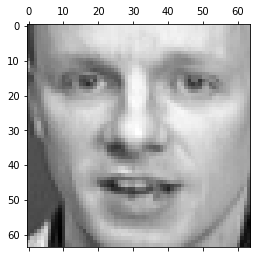

In [17]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split


data = fetch_olivetti_faces(shuffle=True, random_state= 42 ).data
target = fetch_olivetti_faces(shuffle=True, random_state= 42).target

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.33, random_state=42)


#data
plt.matshow(data[0].reshape(64,64), cmap='gray');

#### 1. Write `torch` compatible dataset and dataloader

In [18]:
class FacesData(torch_data.Dataset):
    def __init__(self, X, y):
        super(FacesData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)                                                           
        self.y = y.astype(int)
    
    def __len__(self):
        return self.X.shape[0] ### YOUR CODE HERE ###
    
    def __getitem__(self, idx):
        return self.X[idx].unsqueeze(0), self.y[idx]

In [19]:
train_dset = FacesData(X_train, y_train) 
test_dset = FacesData(X_test, y_test) 

print(train_dset[5])

(tensor([[0.4504, 0.6694, 0.7893,  ..., 0.1240, 0.1240, 0.1240]]), 18)


#### 2. Write Autoencoder model as object of  `torch.nn.Module` class

It takes as input encoder and decoder (it will be small neural networks).

In [20]:
class MyFirstAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        z = self.encoder(x)  ### YOUR CODE HERE ###
        x_out = self.decoder(z)  ### YOUR CODE HERE ###
        return x_out #

#### 3. Define Encoder and Decoder, they will be symmetrical

You should define variable for bottelneck layer - `hid` and for number of neurons in the whole network  - `ss`.

In [21]:
ss = 128

samples, sample_size = data.shape

encoder = lambda hid: nn.Sequential(
                        nn.Linear(sample_size, ss*4),
                        nn.LeakyReLU(inplace=True),
                        nn.Dropout(0.2),
                        nn.Linear(ss*4, ss*2),
                        nn.LeakyReLU(inplace=True),
                        nn.Dropout(0.2),
                        nn.Linear(ss*2, hid)
                        )  ### YOUR CODE HERE ###

decoder =  lambda hid: nn.Sequential(
                        nn.Linear(hid, ss*2),
                        nn.LeakyReLU(inplace=True),
                        nn.Dropout(0.2),
                        nn.Linear(ss*2, ss*4),
                        nn.LeakyReLU(inplace=True),
                        nn.Dropout(0.2),
                        nn.Linear(ss*4, sample_size),
                        nn.Sigmoid(),
                        )  ### YOUR CODE HERE ###

#### 4. Defining criterion, optimizer, scheduler and data loaders

Choose criterion, it will be `nnMSEloss` for now, optimizer and scheduler for optimiser

Quiestion: why do we need the scheduler?

In [22]:
#device = 'cuda:0'  ### YOUR CODE HERE ###
device = 'cpu'

net = MyFirstAE(encoder(60), decoder(60))  ### YOUR CODE HERE ###
criterion = nn.MSELoss() ### YOUR CODE HERE ###
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)  ### YOUR CODE HERE ###
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.7)  ### YOUR CODE HERE ###


train_loader = torch_data.DataLoader(train_dset, batch_size=100, shuffle=True)  ### YOUR CODE HERE ###
val_loader = torch_data.DataLoader(test_dset, batch_size=100, shuffle=False)  ### YOUR CODE HERE ###

#### 5. The main part - write `train` for the network

Train will take the batch, send to the device, encode and decode it and calculate the loss.

In [23]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    net.to(device)
    for epoch in range(1, epochs+1):
        net.train()
        for X, _ in train_loader:
             ### YOUR CODE HERE ###
            X = X.to(device)
            
            out = net(X)
            loss = criterion(out, X)
            
            optimizer.zero_grad()
            
            loss.backward()
            optimizer.step()
             ###

        net.eval()
        for X, _ in val_loader:
             ### YOUR CODE HERE ###
            X = X.to(device)
            out = net(X)
            val_loss = criterion(out, X)
             ###
         
        if scheduler is not None:
            scheduler.step()
        freq = max(epochs//20,1)
        if verbose and epoch%freq==0:
            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, loss.item(), val_loss.item()))
            
    if save_dir is not None:
        torch.save(model.state_dict(), os.path.join(save_dir, 'model.pth'))

#### 5. Enjoy the training

In [24]:
# for `MSE` loss lets get < 0.011 on validation, with AE "bottleneck" = 50

train(300, net, criterion, optimizer, train_loader, val_loader, scheduler)  ### YOUR CODE HERE ###

Epoch 15/300 || Loss:  Train 0.0205 | Validation 0.0187
Epoch 30/300 || Loss:  Train 0.0188 | Validation 0.0180
Epoch 45/300 || Loss:  Train 0.0181 | Validation 0.0173
Epoch 60/300 || Loss:  Train 0.0168 | Validation 0.0172
Epoch 75/300 || Loss:  Train 0.0163 | Validation 0.0160
Epoch 90/300 || Loss:  Train 0.0150 | Validation 0.0144
Epoch 105/300 || Loss:  Train 0.0132 | Validation 0.0136
Epoch 120/300 || Loss:  Train 0.0125 | Validation 0.0129
Epoch 135/300 || Loss:  Train 0.0124 | Validation 0.0123
Epoch 150/300 || Loss:  Train 0.0122 | Validation 0.0120
Epoch 165/300 || Loss:  Train 0.0118 | Validation 0.0119
Epoch 180/300 || Loss:  Train 0.0126 | Validation 0.0118
Epoch 195/300 || Loss:  Train 0.0117 | Validation 0.0118
Epoch 210/300 || Loss:  Train 0.0115 | Validation 0.0117
Epoch 225/300 || Loss:  Train 0.0114 | Validation 0.0117
Epoch 240/300 || Loss:  Train 0.0108 | Validation 0.0117
Epoch 255/300 || Loss:  Train 0.0122 | Validation 0.0116
Epoch 270/300 || Loss:  Train 0.0106 

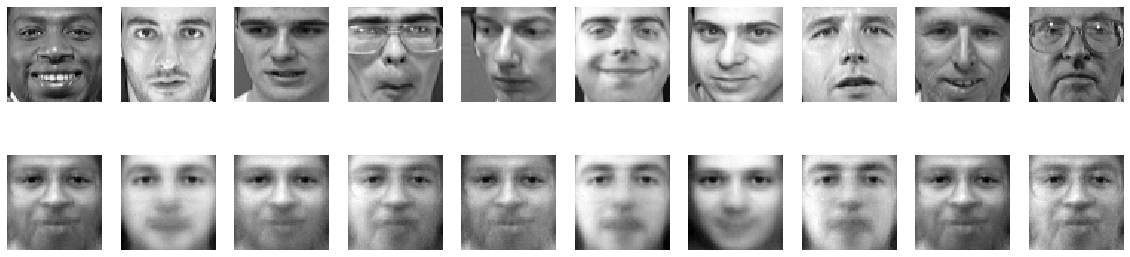

In [25]:
 ### it was for AE with ss = 128, epochs = 500, bottleneck = 50, MSE = 0.011 val
fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))

n_pics = 64

for i in range(10):
    im = train_dset[i][0]
    rec = net(im.reshape(1,n_pics**2).to(device))[0]
    ax[0, i].imshow(im[0].reshape(n_pics,n_pics), cmap = "gray");
    ax[1, i].imshow(rec.detach().cpu().reshape(n_pics,n_pics), cmap = "gray");
    ax[0, i].axis('off')
    ax[1, i].axis('off')

In [26]:
from matplotlib import offsetbox
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_embedding(X, y, images_small=None, title=None):
    """
    Nice plot on first two components of embedding with Offsets.
    
    """
    # take only first two columns
    X = X[:, :2]
    # scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(13,8))
    ax = plt.subplot(111)
    
    for i in range(X.shape[0] - 1):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.RdGy(y[i]),
                 fontdict={'weight': 'bold', 'size': 12})
        if images_small is not None:
            imagebox = OffsetImage(images_small[i], zoom=.4, cmap = 'gray')
            ab = AnnotationBbox(imagebox, (X[i, 0], X[i, 1]),
                xycoords='data')                                  
            ax.add_artist(ab)
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-1:
                # don't show points that are too close
                continue
    if title is not None:
        plt.title(title)

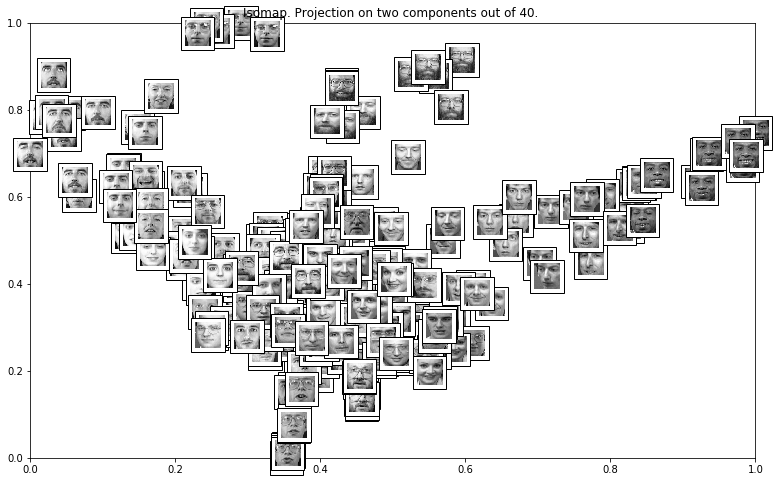

In [27]:
from sklearn.manifold import Isomap
X_isomap = Isomap(n_components= 40).fit_transform(data)
data_pic = data.reshape((-1, 64, 64))
plot_embedding(X_isomap, target, data_pic, "Isomap. Projection on two components out of 40. ")

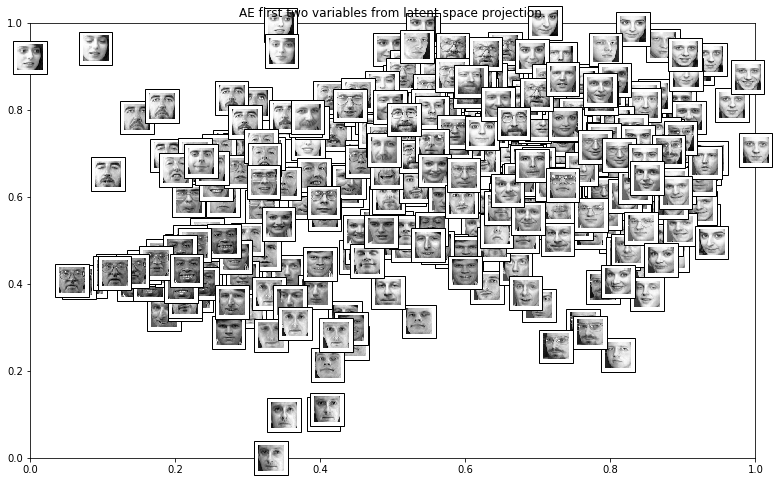

In [28]:
X_projected = net.encoder(torch.Tensor(data)).detach().numpy()
data_pic = data.reshape((-1, 64, 64))
plot_embedding(X_projected, target, data_pic, "AE first two variables from latent space projection.")

### Now let's apply clustering methods:

In [29]:
# new pivot
face_cluster = pd.DataFrame()

# agglomerative clustering on Isomap
X = X_isomap
y = target

ac = AgglomerativeClustering(n_clusters = 20)
ac.fit(X)

y_pred = LabelEncoder().fit_transform(ac.labels_)

plot_3d(X, y_pred, 'AgglomerativeClustering, n_clusters = 20 ')
face_cluster = cluster_scoreing_pivot(X, y, y_pred, face_cluster , 'AgglomerativeClustering Isomap')

Homogeneity: 0.621
Completeness: 0.810
V-measure: 0.703
Silhouette Score: 0.254
Adjusted Rand-Index: 0.309
Mutual Information: 2.291


In [30]:
X = X_projected
y = target

ac = AgglomerativeClustering(n_clusters = 20)
ac.fit(X)

y_pred = LabelEncoder().fit_transform(ac.labels_)

plot_3d(X, y_pred, 'AgglomerativeClustering, n_clusters = 20 ')
face_cluster = cluster_scoreing_pivot(X, y, y_pred, face_cluster , 'AgglomerativeClustering AE')

Homogeneity: 0.480
Completeness: 0.627
V-measure: 0.544
Silhouette Score: 0.260
Adjusted Rand-Index: 0.157
Mutual Information: 1.771


In [31]:
face_cluster

,algorithm,comp,hom,mutual info,rand. index,silhouette,v-measure
0,AgglomerativeClustering Isomap,0.809886,0.621172,2.291427,0.308514,0.253942,0.703086
1,AgglomerativeClustering AE,0.627025,0.480123,1.771117,0.156587,0.260193,0.543828


### Try different clustering algoritms to get best score on V-measure on Faces whole sample. 

What will be more accurate: classification or clustering?